#### This course is based on Julien Mairal course on Kernel Methods for Machine Learning. This notebook corresponds to the first class of the course. You can find the slides in the following link: https://members.cbio.mines-paristech.fr/~jvert/svn/kernelcourse/slides/master2017/master2017.pdf

# RKHS
---

* This lecture covers the slides 24-41.

- Among the Hilbert spaces $H$ mentioned in Aronszjan's theorem, we will see that one of them, called **RKHS**, is of interest to us.
- This is a **space of functions** from $X$ to $\mathbb{R}$.
- In other words, each data point $x$ in $X$ will be represented by a function $\phi(x) = K_x$ in $H$.

### Example of functional mapping.

* Considere $X = \mathbb{R}$. We could decide to represent each scalar $x$ in $\mathbb{R}$ as a Gaussian function centered at $x$:

$$K_x: y \rightarrow \exp^{-\frac{1}{2 \alpha}(x-y)^2} $$

In [46]:
import numpy as np
data = np.random.rand(10) * 100

alpha = 10

def gaussian_function(x):
    def K_x(y):
        return np.exp(-1/(2*alpha**2) * (x-y)**2)
    return K_x

In [47]:
def graph(f):
    x = np.linspace(-200, 200, 1000)
    y = f(x)
    plt.plot(x, y)

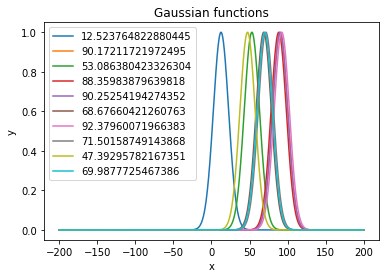

In [48]:
import matplotlib.pyplot as plt

for i in range(len(data)):
    K_i = gaussian_function(data[i])
    graph(K_i)
plt.legend(data)
plt.title("Gaussian functions")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

- What could be the corresponding $H$ (if it exists)? What would be the inner-product?

### Example: Gaussian Kernel

Ex: If $x, y \in \mathbb{R}$ and $K(x, y) = \exp^{-\frac{1}{\sigma^2}(x-y)**2}$ is the Gaussian kernel, 

$$ \phi(x): t \rightarrow \exp^{- \frac{1}{\sigma^2}(x-t)^2} $$
$$ \phi(x): t \rightarrow \exp^{- \frac{1}{\sigma^2}(y-t)^2} $$

In [50]:
sigma = 1
def gaussian_kernel(x, y):
    return np.exp(-1/sigma^2 * (x-y)**2)

- Data points are mapped to Gaussian functions living in a Hilbert space $H$.
- But $H$ is much richer and contains much more than Gaussian functions!
- Prediction function $f$ live in $H$: $f(x) = \langle f, \phi(x) \rangle$

## RKHS Definition

---

Let $X$ be a set and $H \subset \mathbb{R}^{X}$ be a class of functions forming a (real) Hilbert space with inner product$ \langle ., . \rangle_{H}$. The function $K: X^2 \rightarrow \mathbb{R}$ is called a **reproducing kernel (r.k.)** of $H$ if:

1. $H$ contains all functions of the form
$$\forall x \in X, \quad K_x: t \rightarrow K(x, t) $$

2. For every $x \in X$ and $f \in H$ the **reproducing property** holds: 
$$f(x) = \langle f, K_x \rangle_H $$

If a r.k exists, then $H$ is called a **reproducing kernel Hilbert space (RKHS)**.




#### A simple recipe

1. Map data $x$ in $X$ to a high-dimensional Hilbert space $H$ (the RKHS) through a kernel mapping $\phi: X \rightarrow H$, with $\phi(x) = K_x$.
2. In $H$, consider **simple linear models** $f(x) = \langle f, \phi(x) \rangle_{H}$.
3. If $X = \mathbb{R}^p$, a linear function in $\phi(x)$ may be nonlinear in $x$.
4. For instance, for supervised learning, given training data $(y_i, x_i)_{i = 1, \dots, n}$, we may want to minimize the **empirical risk**.

$$\min_{f \in H} \frac{1}{n} \sum\limits_{i=1}^{n} L(y_i, f(x_i)) + \lambda ||f||^2_{H} $$

### Theorem

The Hilbert space $H \subset \mathbb{R}^{X}$ is a RKHS if and only if for any $x \in X$, the (linear) mapping: 

$$F: H \rightarrow \mathbb{R} $$
is continuous.

### Proof

You can find the proof in slide 30 and 31.

### Theorem

- If $H$ is a RKHS, then it has a unique r.k ("easy" to prove)
- Conversely, a function $K$ can be the r.k of at most one RKHS ("complicated" to prove), i.e, the RKHS of a r.k $K$ is unique.
 
### Proof

You can find the proof at slide 33.

#### Consequence

This show that we can talk of "the" kernel of a RKHS, or "the" RKHS of a kernel.

### Theorem (important result)

A function $K: X \times X \rightarrow \mathbb{R}$ is **p.d** if and only if it is a **r.k**.

### Proof

You can find the proof at slides 35 to 40. 
**This theorem proves the sufficient condition of the Aronzsajn's theorem!**